In [ ]:
!pip install pymatrix

  Created wheel for pymatrix: filename=pymatrix-3.0.1-cp36-none-any.whl size=7067 sha256=1082fa4718ba01c6c1086142849eb3819f59d0ebfb81121a19287875b52b7308
  Stored in directory: /root/.cache/pip/wheels/7a/b5/9a/d5e6c01679e1a22385c2112e667314703a79fe7560a33f824c
Successfully built pymatrix


In [ ]:
!pip install linalg

  Created wheel for linalg: filename=linalg-1.0.4-cp36-none-any.whl size=6294 sha256=7f44d29f192fc8fe6e068732f46b541c0ec924d1a17c57a8aa55a2c6e5a2f6c1
  Stored in directory: /root/.cache/pip/wheels/a6/09/2b/ed39c10f756adfcf310484fda9ff8ca0f647fc08fb2171a76b
Successfully built linalg


In [ ]:
import numpy as np
import random
from threading import Thread
import time
import pandas as pd
import sympy as sp
from sympy.matrices import Matrix
import linalg
from pymatrix import Matrix
import tensorflow as tf


In [ ]:
size = 100
mat1 = np.random.randint(1,10,(size,size))
mat2 = np.random.randint(1,10,(size,size))


In [ ]:
mat1.shape,mat2.shape

((100, 100), (100, 100))

Serial

In [ ]:
def matmul_serial(mat1,mat2):

  res = np.array([[0 for x in range(mat1.shape[1])] for y in range(mat2.shape[0])])
  start=time.time()
  for i in range(len(mat1)):
      for j in range(len(mat2[0])):
          for k in range(len(mat2)):

              res[i][j] += mat1[i][k] * mat2[k][j]
  return ("Serial",time.time()-start)

Data Parallel

In [ ]:
def multiply(n1,n2,rets,ind):
    rets[ind]= n1*n2
def matmul_data_parallel(a,b):
    threads = [None] * len(a)
    ret = [None] * len(a)
    res = []
    start=time.time()
    for i in range (len(a)):
        dummy_var=[]
        for j in range(len(b[0])):
            for k in range(len(b)):
                threads[k] = Thread(target=multiply, args=(a[i][k],b[k][j],ret,k))
                threads[k].start()
            dummy_var.append(sum(ret))
            # print(dummy_var)
        res.append(dummy_var)
    return ("Data Parallel",time.time()-start)



Numpy Implementation

In [ ]:
def matmul_np(mat1,mat2):
  start=time.time()
  mat1 @ mat2
  return ("Numpy",time.time()-start)

In [ ]:
matmul_np(mat1,mat2)

('Numpy', 0.003731250762939453)

Pandas Implementation


In [ ]:
def matmul_pandas(mat1,mat2):
  start=time.time()
  mat1_df=pd.DataFrame(data=mat1)
  mat2_df=pd.DataFrame(data=mat2)
  mat1_df.dot(mat2_df)
  return ("Pandas",time.time()-start)

In [ ]:
matmul_pandas(mat1,mat2)

('Pandas', 0.0036382675170898438)

Sympy Implementation

In [ ]:
def matmul_sympy(mat1,mat2):
  start=time.time()
  sp.Matrix(mat1)*(sp.Matrix(mat2))
  return ("Sympy",time.time()-start)

In [ ]:
matmul_sympy(mat1,mat2)

('Sympy', 3.007856607437134)

PyMatrix Implementation

In [ ]:
def matmul_pymatrix(mat1,mat2):
  start=time.time()
  m1=Matrix.from_list(mat1)
  m2=Matrix.from_list(mat2)
  m1*m2
  return ("pymatrix",time.time()-start)



In [ ]:
matmul_pymatrix(mat1,mat2)

('pymatrix', 0.8341310024261475)

Linalg Implementation

In [ ]:
def matmul_linalg(mat1,mat2):
  start=time.time()
  # m1=linalg.Matrix(mat1)
  # m2=linalg.Matrix(mat2)
  m1 = linalg.random_matrix((size, size), (0, 10))
  m2 = linalg.random_matrix((size, size), (0, 10))
  m1 @ m2
  return ("Linalg",time.time()-start)



In [ ]:
matmul_linalg(mat1,mat2)

('Linalg', 0.09282279014587402)

Tensorflow

In [ ]:
def matmul_tf(mat1,mat2):
  start=time.time()
  m1=tf.convert_to_tensor(mat1,dtype=tf.int32)
  m2=tf.convert_to_tensor(mat2,dtype=tf.int32)
  tf.matmul(m1,m2)
  return ("Tensorflow",time.time()-start)


In [ ]:
matmul_tf(mat1,mat2)

('Tensorflow', 0.0012638568878173828)

In [ ]:
all_functions={}
for i in [matmul_tf,matmul_linalg,matmul_pymatrix,matmul_sympy,matmul_pandas,matmul_np,matmul_data_parallel,matmul_serial]:
  key,value=i(mat1,mat2)
  all_functions[key]=value


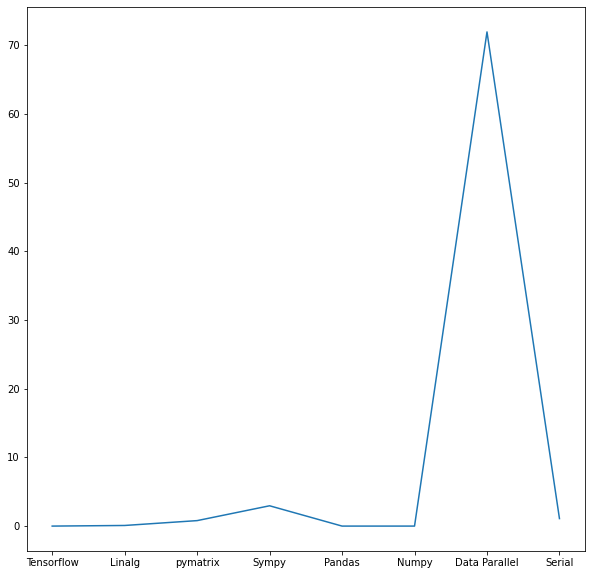

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(len(all_functions)), list(all_functions.values()))
plt.xticks(range(len(all_functions)), list(all_functions.keys()))
plt.show()